In [1]:
import matplotlib.pyplot as plt

params = {"ytick.color" : "black",
            "xtick.color" : "black",
            "axes.labelcolor" : "black",
            "axes.edgecolor" : "black",
            "text.usetex" : True,
            "font.family" : "serif",
            "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

import os

C:\Users\Fran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastkml\config.py:28: UserWarning: Package `lxml` missing. Pretty print will be disabled
  warnings.warn("Package `lxml` missing. Pretty print will be disabled")


Text(0, 0.5, 'Latitude')

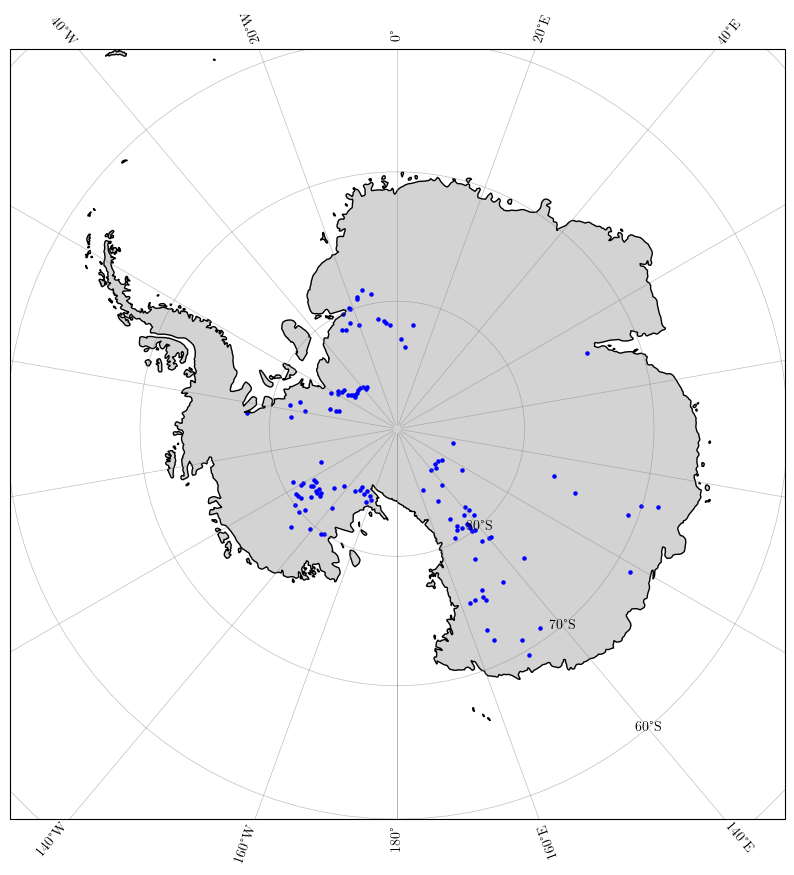

In [2]:
from fastkml import kml
from shapely.geometry import shape
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gvc


os.environ["CARTOPY_USER_BACKGROUNDS"] = "./Maps"

# Load and parse the KML file
k = kml.KML()
with open('Antarctic_lakes.kml', 'rt', encoding='utf-8') as file:
    k.from_string(file.read())

# Extract features from KML
features = []
for feature in k.features():
    if isinstance(feature, kml.Document):
        for sub_feature in feature.features():
            if isinstance(sub_feature, kml.Placemark):
                geom = shape(sub_feature.geometry)
                features.append({'geometry': geom, 'name': sub_feature.name})

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(features, crs='EPSG:4326')

# Define the polar projection
polar_projection = ccrs.SouthPolarStereo()

# Plot using Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': polar_projection})

# Add base map features
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Set extent for polar projection
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Transform GeoDataFrame to the polar projection
gdf_polar = gdf.to_crs(polar_projection.proj4_init)
#print(gdf)

#from gdf_polar extract only the latitude and longitude
gdf_polar['geometry'] = gdf_polar['geometry'].apply(lambda x: x.representative_point())
gdf_polar['longitude'] = gdf_polar['geometry'].apply(lambda x: x.x)
gdf_polar['latitude'] = gdf_polar['geometry'].apply(lambda x: x.y)

#save longitude and latitude to a new list
longitude = gdf_polar['longitude'].tolist()
latitude = gdf_polar['latitude'].tolist()

#combine longitude and latitude into a list of tuples
coordinates_icesat = list(zip(longitude, latitude))
#print(coordinates_icesat)

# Plot the lakes
gdf_polar.plot(ax=ax, marker='o', color='blue', markersize=5, transform=polar_projection)

# Add gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = []
gl.ylabels_right = []
gl.xlocator = plt.MultipleLocator(20)
gl.ylocator = plt.MultipleLocator(10)
gl.xformatter = gvc.LongitudeFormatter(degree_symbol='°')
gl.yformatter = gvc.LatitudeFormatter(degree_symbol='°')

# Set plot title and labels
#ax.set_title('Lakes in Antarctica')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


#plt.savefig(r'C:\Users\Fran\Dropbox\Apps\Overleaf\Science in Polar Regions - Essay\Essay\Contents\Graphics\Antarctic_lakes.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Latitude')

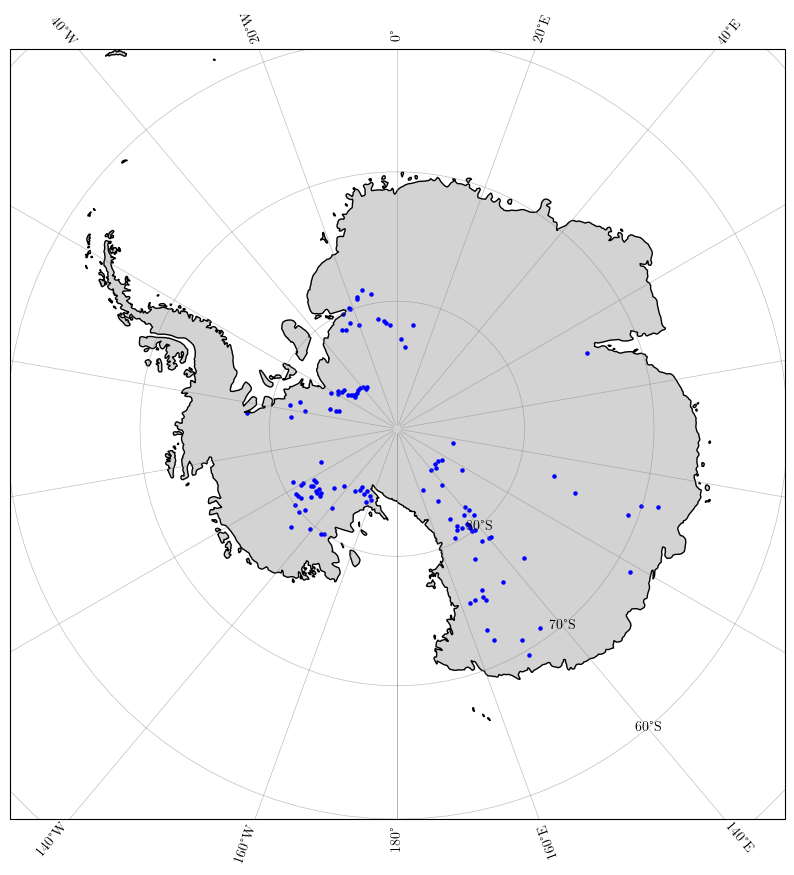

In [3]:
from fastkml import kml
from shapely.geometry import shape
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gvc


os.environ["CARTOPY_USER_BACKGROUNDS"] = "./Maps"

# Load and parse the KML file
k = kml.KML()
with open('Antarctic_lakes.kml', 'rt', encoding='utf-8') as file:
    k.from_string(file.read())

# Extract features from KML
features = []
for feature in k.features():
    if isinstance(feature, kml.Document):
        for sub_feature in feature.features():
            if isinstance(sub_feature, kml.Placemark):
                geom = shape(sub_feature.geometry)
                features.append({'geometry': geom, 'name': sub_feature.name})

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(features, crs='EPSG:4326')

# Define the polar projection
polar_projection = ccrs.SouthPolarStereo()

# Plot using Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': polar_projection})

# Add base map features
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Set extent for polar projection
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Transform GeoDataFrame to the polar projection
gdf_polar = gdf.to_crs(polar_projection.proj4_init)
#print(gdf)

#from gdf_polar extract only the latitude and longitude
gdf_polar['geometry'] = gdf_polar['geometry'].apply(lambda x: x.representative_point())
gdf_polar['longitude'] = gdf_polar['geometry'].apply(lambda x: x.x)
gdf_polar['latitude'] = gdf_polar['geometry'].apply(lambda x: x.y)

#save longitude and latitude to a new list
longitude = gdf_polar['longitude'].tolist()
latitude = gdf_polar['latitude'].tolist()

#combine longitude and latitude into a list of tuples
coordinates_icesat = list(zip(longitude, latitude))
#print(coordinates_icesat)

# Plot the lakes
gdf_polar.plot(ax=ax, marker='o', color='blue', markersize=5, transform=polar_projection)

# Add gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = []
gl.ylabels_right = []
gl.xlocator = plt.MultipleLocator(20)
gl.ylocator = plt.MultipleLocator(10)
gl.xformatter = gvc.LongitudeFormatter(degree_symbol='°')
gl.yformatter = gvc.LatitudeFormatter(degree_symbol='°')

# Set plot title and labels
#ax.set_title('Lakes in Antarctica')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


#plt.savefig(r'C:\Users\Fran\Dropbox\Apps\Overleaf\Science in Polar Regions - Essay\Essay\Contents\Graphics\Antarctic_lakes.png', dpi=300, bbox_inches='tight')

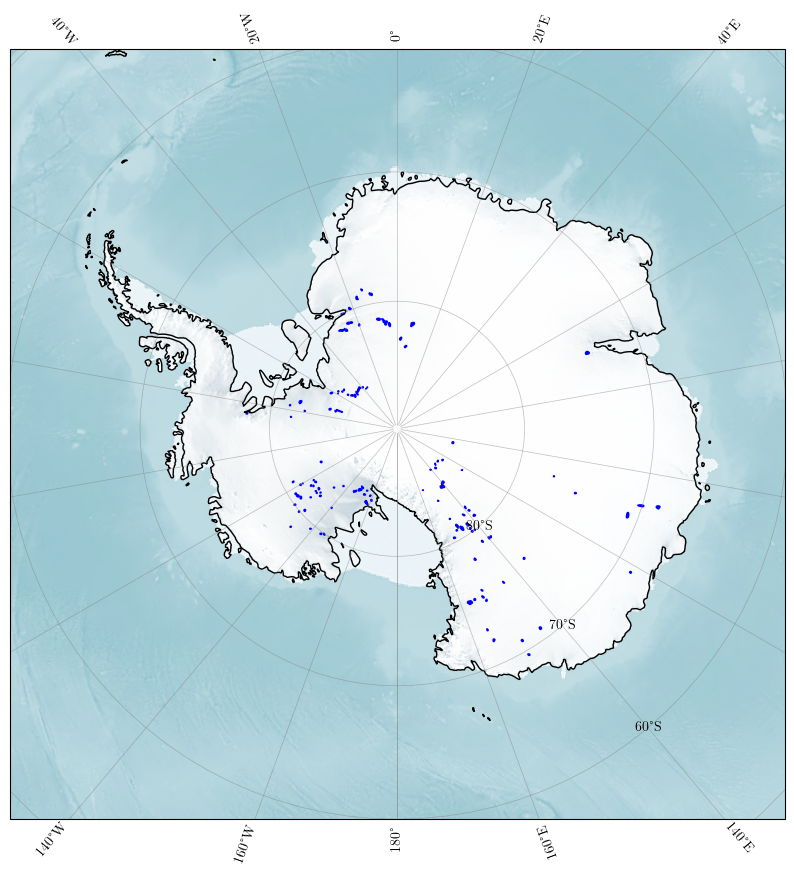

In [21]:
from fastkml import kml
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gvc

# Load and parse the KML file
k = kml.KML()
with open('Antarctic_lakes.kml', 'rt', encoding='utf-8') as file:
    k.from_string(file.read())

# Extract features from KML
features = []
for feature in k.features():
    if isinstance(feature, kml.Document):
        for sub_feature in feature.features():
            if isinstance(sub_feature, kml.Placemark):
                geom = shape(sub_feature.geometry)
                features.append({'geometry': geom, 'name': sub_feature.name})

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(features, crs='EPSG:4326')

# Define the polar projection
polar_projection = ccrs.SouthPolarStereo()

# Plot using Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': polar_projection})



# Add base map features
#ax.add_feature(cfeature.LAND, facecolor='lightgrey')
#ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Set extent for polar projection
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

ax.background_img(name='ETOPO', resolution='high')

# Transform GeoDataFrame to the polar projection
gdf_polar = gdf.to_crs(polar_projection.proj4_init)

# Plot the lakes
gdf_polar.plot(ax=ax, color='blue', markersize=20, edgecolor='blue', transform=polar_projection)

# Add gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = []
gl.ylabels_right = []
gl.xlocator = plt.MultipleLocator(20)
gl.ylocator = plt.MultipleLocator(10)
gl.xformatter = gvc.LongitudeFormatter(degree_symbol='°')
gl.yformatter = gvc.LatitudeFormatter(degree_symbol='°')

# Set plot title and labels
#ax.set_title('Lakes in Antarctica')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.savefig(r'C:\Users\Fran\Dropbox\Apps\Overleaf\Science in Polar Regions - Essay\Essay\Contents\Graphics\Antarctic_lakes.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
from shapely.geometry import Point

# Load the Excel file
file_path = 'S095410201200048Xsup001.xls'
df = pd.read_excel(file_path, usecols=[2, 3, 9], header=0, names=['Longitude', 'Latitude', 'Depth'])

df = df[:375]

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Latitude'], df['Longitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

#print(gdf)

# Define the polar projection
polar_projection = ccrs.SouthPolarStereo()

# Transform GeoDataFrame to the polar projection
gdf_polar = gdf.to_crs(polar_projection.proj4_init)


     Longitude    Latitude   Depth                          geometry
0   -78.100000   88.500000  4200.0     POINT (1333306.821 34913.868)
1   -78.150000  104.500000  3945.0   POINT (1285817.395 -332534.989)
2   -76.570000  124.800000  3621.0   POINT (1237207.824 -859881.838)
3   -73.280000  157.280000  2827.0   POINT (726245.611 -1734445.169)
4   -77.200000  119.270000  3835.0   POINT (1252152.001 -701813.092)
..         ...         ...     ...                               ...
370 -73.438228  126.023279  3707.0  POINT (1506202.326 -1095255.317)
371 -73.814169  125.655172  3644.0  POINT (1478410.945 -1060593.051)
372 -74.290807  122.585428  3745.0   POINT (1487383.397 -950688.451)
373 -74.300259  122.502928  3709.0   POINT (1487844.123 -947968.140)
374 -75.980514  106.045218  3521.0   POINT (1512141.091 -434891.283)

[375 rows x 4 columns]


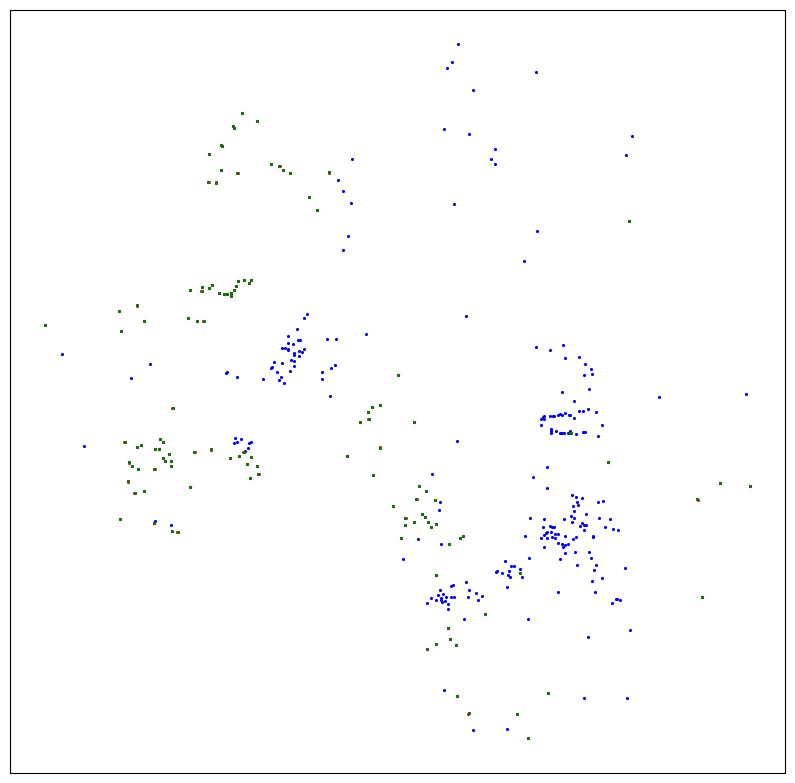

In [5]:
#print(coordinates_icesat)
print(gdf_polar)

#extract coordinates from gdf_polar
gdf_polar['geometry'] = gdf_polar['geometry'].apply(lambda x: x.representative_point())
gdf_polar['longitude'] = gdf_polar['geometry'].apply(lambda x: x.x)
gdf_polar['latitude'] = gdf_polar['geometry'].apply(lambda x: x.y)

#save longitude and latitude to a new list
longitude = gdf_polar['longitude'].tolist()
latitude = gdf_polar['latitude'].tolist()

#combine longitude and latitude into a list of tuples
coordinates_all = list(zip(longitude, latitude))

#print(coordinates_all)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': polar_projection})
for i in range(len(coordinates_all)):
    ax.plot(coordinates_all[i][0], coordinates_all[i][1], 'bo', markersize=1.25, transform=polar_projection)

for i in range(len(coordinates_icesat)):
    ax.plot(coordinates_icesat[i][0], coordinates_icesat[i][1], 'ro', markersize=1.25, transform=polar_projection)


#find overlapping coordinates within +- 10
overlapping_coordinates = []
for i in range(len(coordinates_all)):
    for j in range(len(coordinates_icesat)):
        if coordinates_all[i][0] - 5000 <= coordinates_icesat[j][0] <= coordinates_all[i][0] + 5000 and coordinates_all[i][1] - 5000 <= coordinates_icesat[j][1] <= coordinates_all[i][1] + 5000:
            overlapping_coordinates.append(coordinates_all[i])


#print(overlapping_coordinates)

for i in range(len(overlapping_coordinates)):
    ax.plot(overlapping_coordinates[i][0], overlapping_coordinates[i][1], 'go', markersize=1.25, transform=polar_projection)

In [7]:
#find overlapping points from gdf_polar  and overlapping_coordinates and append the depth to overlapping_coordinates
for i in range(len(overlapping_coordinates)):
    for j in range(len(gdf_polar)):
        if overlapping_coordinates[i][0] == gdf_polar['longitude'][j] and overlapping_coordinates[i][1] == gdf_polar['latitude'][j]:
            overlapping_coordinates[i] = overlapping_coordinates[i] + (gdf_polar['Depth'][j],)

#print(overlapping_coordinates)

# append depth to coordinates_all
for i in range(len(coordinates_all)):
    for j in range(len(gdf_polar)):
        if coordinates_all[i][0] == gdf_polar['longitude'][j] and coordinates_all[i][1] == gdf_polar['latitude'][j]:
            coordinates_all[i] = coordinates_all[i] + (gdf_polar['Depth'][j],)

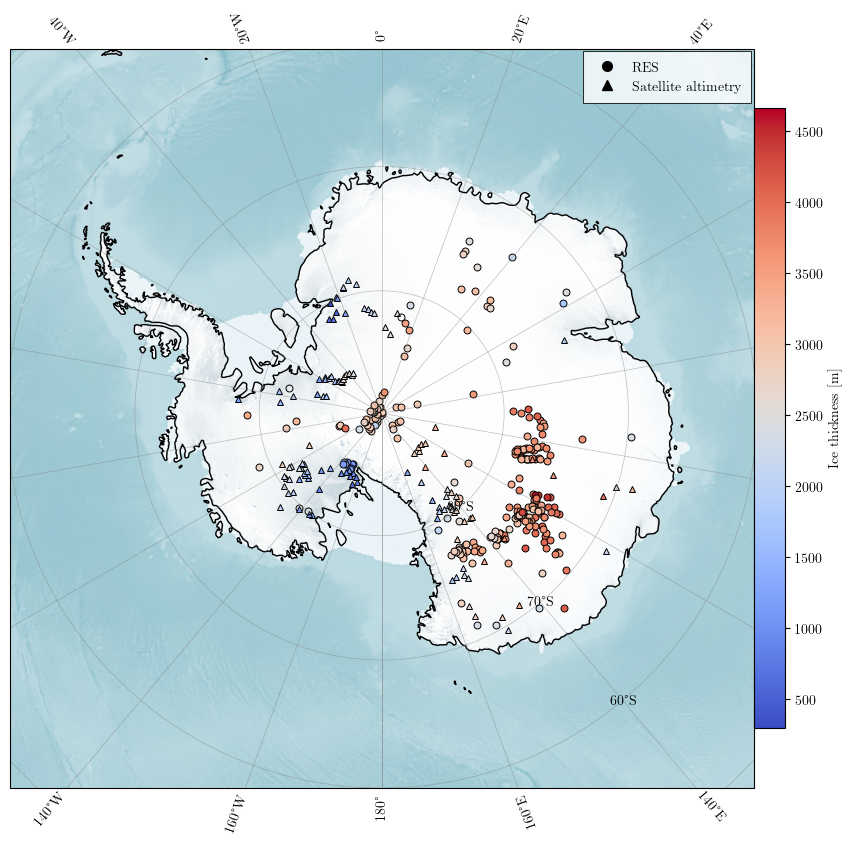

In [8]:
# Plot using Cartopy

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': polar_projection})
# Set extent for polar projection
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
#print(gdf['geometry'])

ax.background_img(name='ETOPO', resolution='high')

# Add base map features
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
#ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

norm = plt.Normalize(vmin=df['Depth'].min(), vmax=df['Depth'].max())
cmap = cm.get_cmap('coolwarm')

# for coordinate in coordinates_all plot the ones that are not in overlapping_coordinates in square and the ones that are in overlapping_coordinates in circle
for i in range(len(coordinates_all)):
    if coordinates_all[i] not in overlapping_coordinates:
        ax.plot(coordinates_all[i][0], coordinates_all[i][1],
                'o', markersize=5, color=cmap(norm(coordinates_all[i][2])),
                markeredgecolor='black', markeredgewidth=0.7, transform=polar_projection)
    else:
        ax.plot(coordinates_all[i][0], coordinates_all[i][1],
                '^', markersize=5, color=cmap(norm(coordinates_all[i][2])),
                markeredgecolor='black', markeredgewidth=0.7, transform=polar_projection)


# Create ScalarMappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We don't need to pass data to `set_array` because it's already plotted

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.04, pad=0)
cbar.set_label('Ice thickness [m]')

# Add gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = []
gl.ylabels_right = []
gl.xlocator = plt.MultipleLocator(20)
gl.ylocator = plt.MultipleLocator(10)
gl.xformatter = gvc.LongitudeFormatter(degree_symbol='°')
gl.yformatter = gvc.LatitudeFormatter(degree_symbol='°')

# add a legend
ax.plot([], [], 'o', markersize=7, color='black', label='RES')
ax.plot([], [], '^', markersize=7, color='black', label='Satellite altimetry')

ax.legend(loc='upper right')
#make legend box have a thicker border and black
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.75)
legend.get_frame().set_edgecolor('black')

#make the legend box square instead of rounded corners
legend.get_frame().set_boxstyle("square")

# Set plot title and labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')




plt.savefig(r'C:\Users\Fran\Dropbox\Apps\Overleaf\Science in Polar Regions - Essay\Essay\Contents\Graphics\Antarctic_lakes_fourth.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

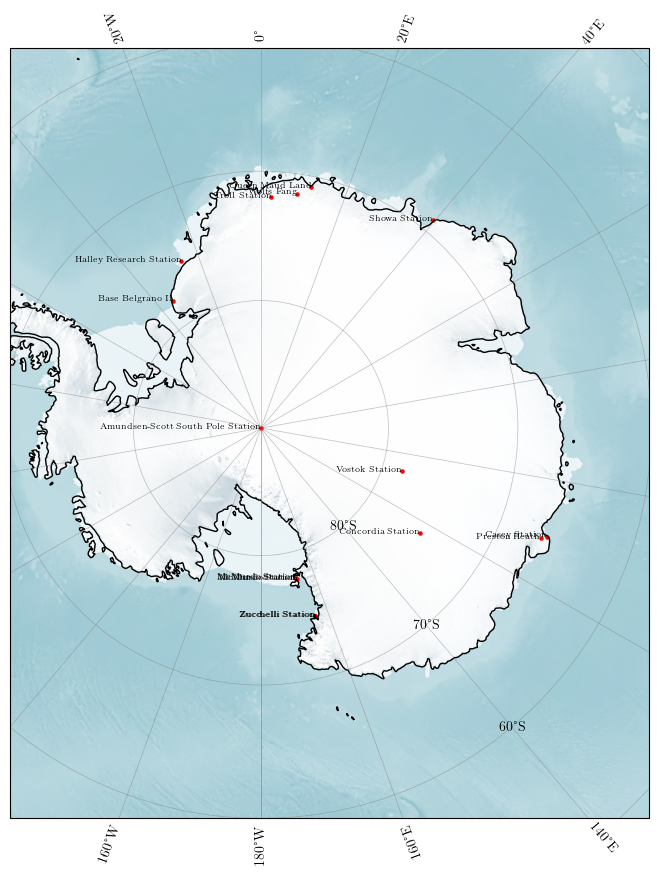

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point

# Load the CSV file
file_path = 'aq-airports.csv'
df = pd.read_csv(file_path, usecols=[4, 5, 13], header=0, names=['Latitude', 'Longitude', 'Name'])

# Create a GeoDataFrame with latitude and longitude points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326')

# Define the polar projection
polar_projection = ccrs.SouthPolarStereo()

# Convert the GeoDataFrame to the polar projection
gdf_polar = gdf.to_crs(polar_projection.proj4_init)

# Define the map extent (longitude and latitude range)
extent = [-40, 180, -90, -60]

# Filter points that fall within the extent
gdf_filtered = gdf[(gdf['Longitude'] >= extent[0]) & (gdf['Longitude'] <= extent[1]) &
                   (gdf['Latitude'] >= extent[2]) & (gdf['Latitude'] <= extent[3])]

# Convert the filtered points to the polar projection
gdf_filtered_polar = gdf_filtered.to_crs(polar_projection)

# Plot using Cartopy with the South Polar projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': polar_projection})

# Set extent for polar projection
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.background_img(name='ETOPO', resolution='high')

# Add base map features
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Plot the airport points that are in the extent
gdf_filtered_polar.plot(ax=ax, marker='o', color='red', markersize=5, transform=polar_projection)

# Plot the names of the airports within the extent
for x, y, label in zip(gdf_filtered_polar.geometry.x, gdf_filtered_polar.geometry.y, gdf_filtered_polar['Name']):
    ax.text(x, y, label, fontsize=6, ha='right', transform=polar_projection)

# Add gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = []
gl.ylabels_right = []
gl.xlocator = plt.MultipleLocator(20)
gl.ylocator = plt.MultipleLocator(10)

# Correctly import the Longitude and Latitude formatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Set plot title and labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


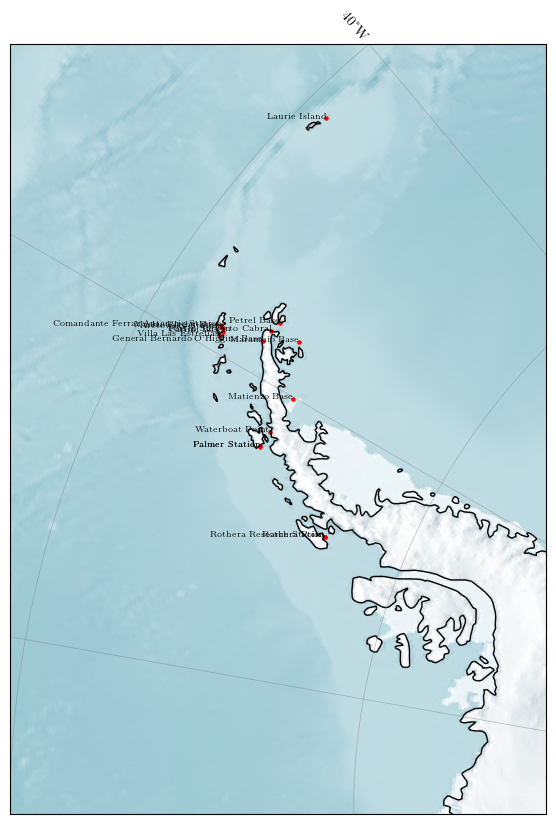

In [67]:
extent = [-90, -40, -68, -60]

# Filter points that fall within the extent
gdf_filtered = gdf[(gdf['Longitude'] >= extent[0]) & (gdf['Longitude'] <= extent[1]) &
                   (gdf['Latitude'] >= extent[2]) & (gdf['Latitude'] <= extent[3])]


# Convert the filtered points to the polar projection
gdf_filtered_polar = gdf_filtered.to_crs(polar_projection)

# Plot using Cartopy with the South Polar projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': polar_projection})

# Set extent for polar projection
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.background_img(name='ETOPO', resolution='high')

# Add base map features
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Plot the airport points that are in the extent
gdf_filtered_polar.plot(ax=ax, marker='o', color='red', markersize=5, transform=polar_projection)

# Plot the names of the airports within the extent
for x, y, label in zip(gdf_filtered_polar.geometry.x, gdf_filtered_polar.geometry.y, gdf_filtered_polar['Name']):
    ax.text(x, y, label, fontsize=6, ha='right', transform=polar_projection)

# Add gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = []
gl.ylabels_right = []
gl.xlocator = plt.MultipleLocator(20)
gl.ylocator = plt.MultipleLocator(10)

# Correctly import the Longitude and Latitude formatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Set plot title and labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()
